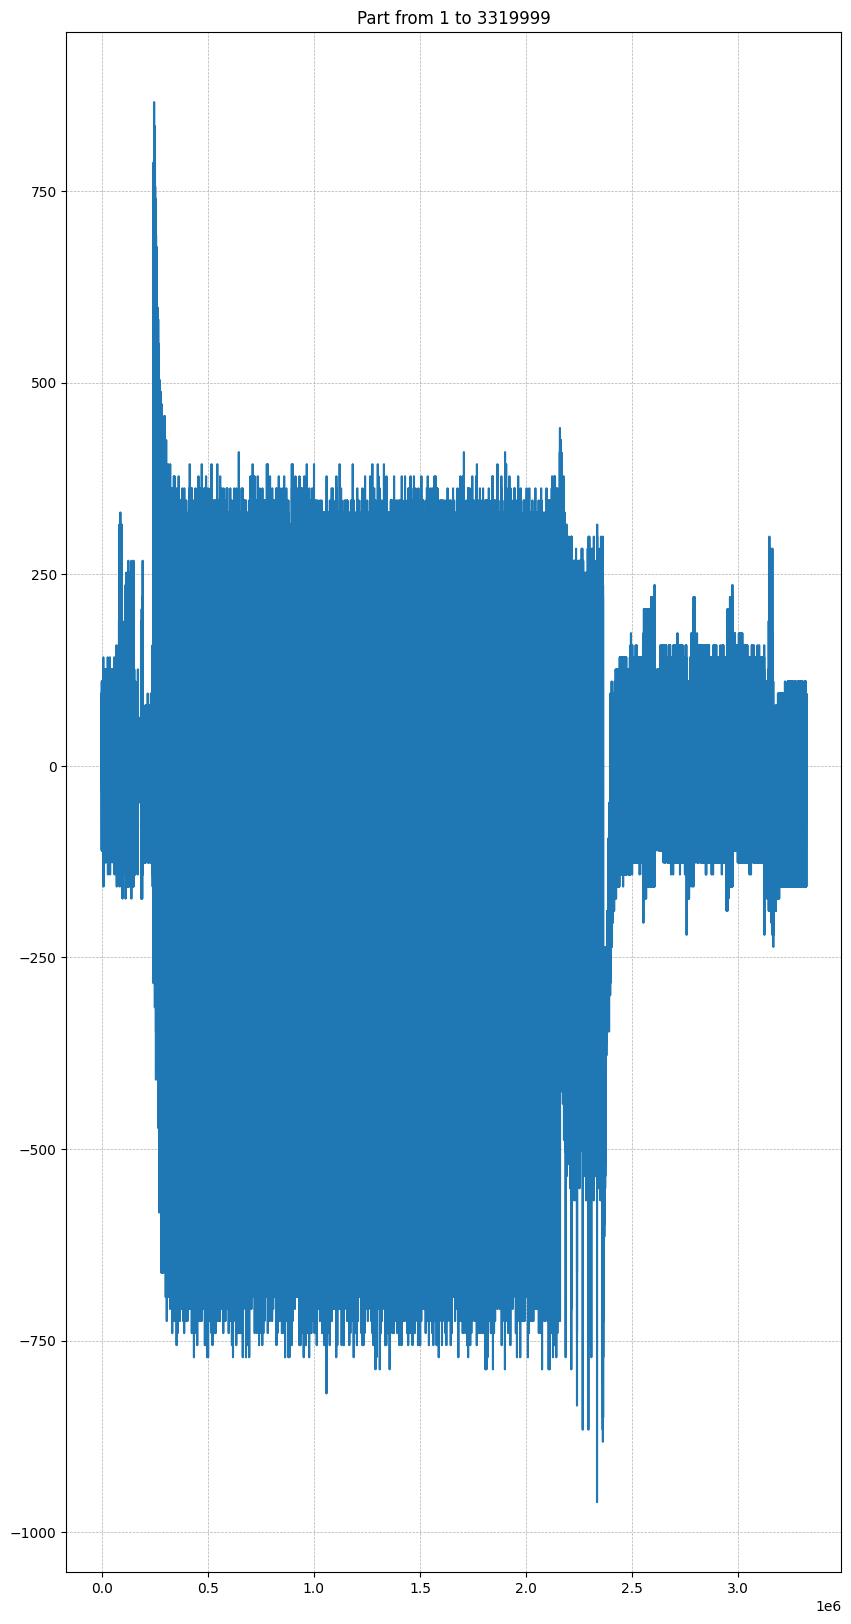

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('SM2.csv')

# 生成x坐标,从1开始
x = range(1, len(data) + 1)
y = data.iloc[:, 1]  # 假设只有一列数据，即纵坐标

# 局部绘图
def plot_part_curve(start_idx, end_idx,op):
    if op==1:
        fig, axes = plt.subplots(2,1,figsize=(10, 20), dpi=100)
        axes[0].plot(x[start_idx:end_idx], y[start_idx:end_idx], linewidth=1.5)
        axes[0].set_title(f'Part from {start_idx} to {end_idx}', fontsize=12)
        axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
        axes[1].plot(x[start_idx:end_idx], y_filtered[start_idx:end_idx], linewidth=1.5)
        axes[1].set_title(f'filtered:Part from {start_idx} to {end_idx}', fontsize=12)
        axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
        # 显示图像
        plt.tight_layout()
        plt.show()
    else:
        fig, axes = plt.subplots(figsize=(10, 20), dpi=100)
        axes.plot(x[start_idx:end_idx], y[start_idx:end_idx], linewidth=1.5)
        axes.set_title(f'Part from {start_idx} to {end_idx}', fontsize=12)
        axes.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.show()
plot_part_curve(1, len(data),0)



## 合理分析开始和结束

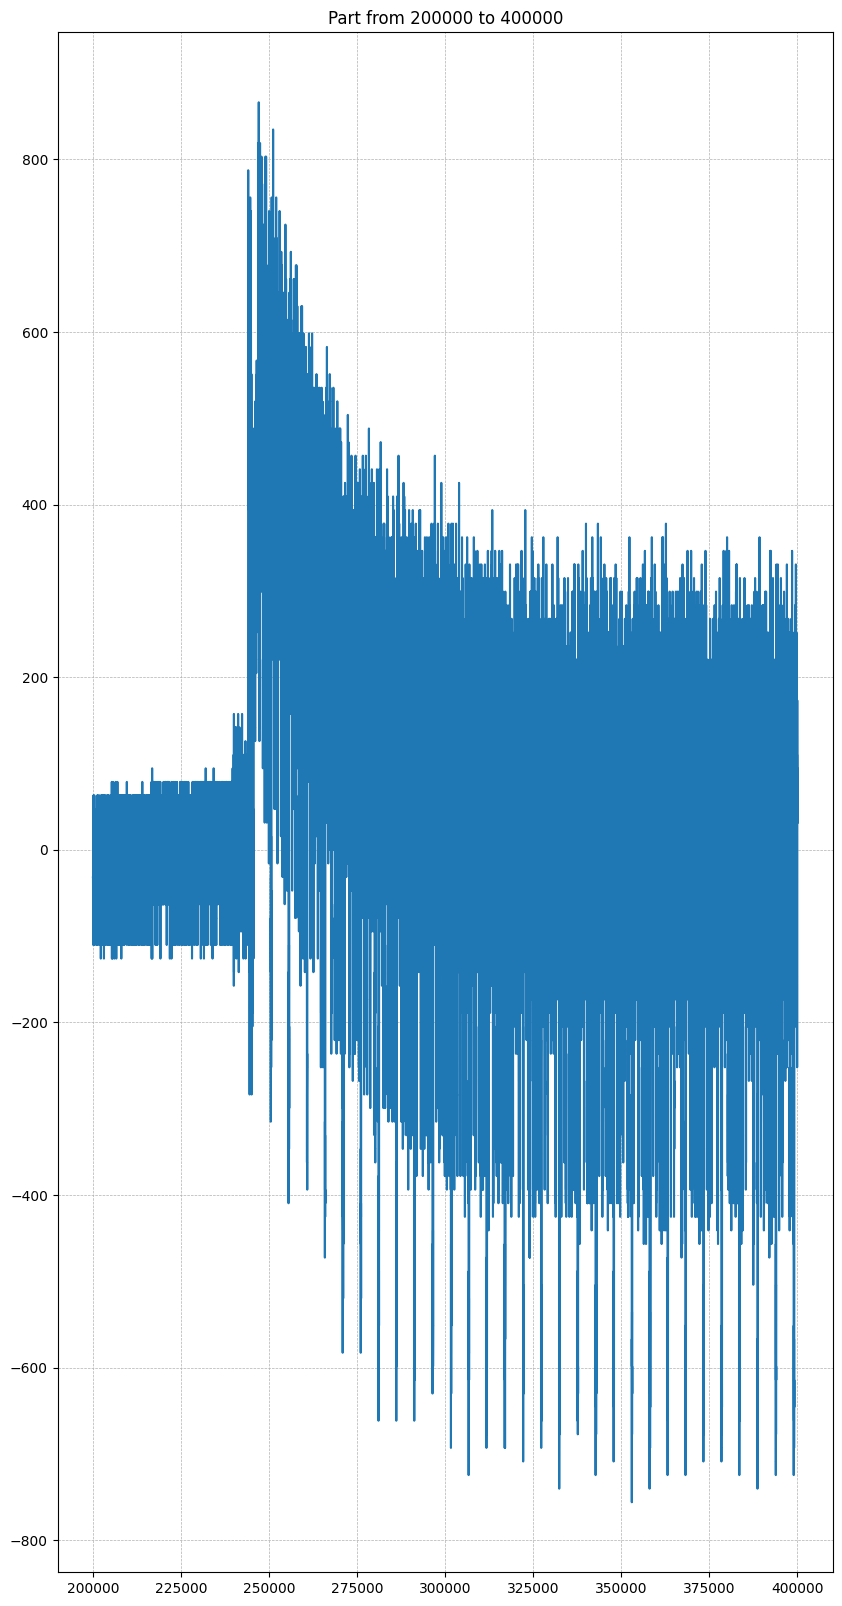

In [27]:
plot_part_curve(200000,400000,0)

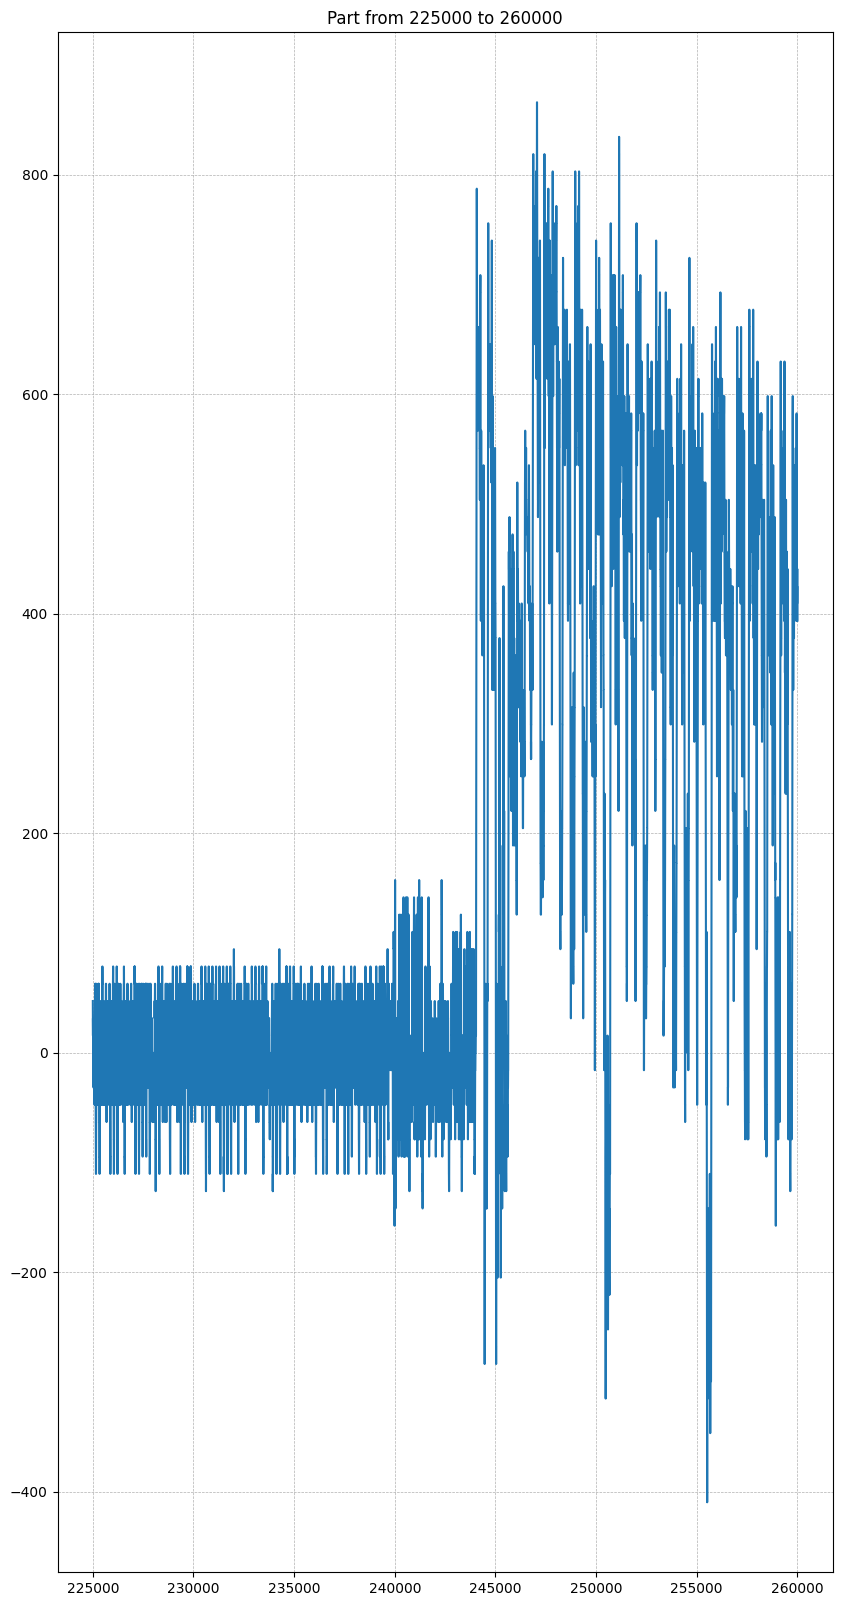

In [29]:
plot_part_curve(225000,260000,0)

所以基本确定开始时刻为大约为245000

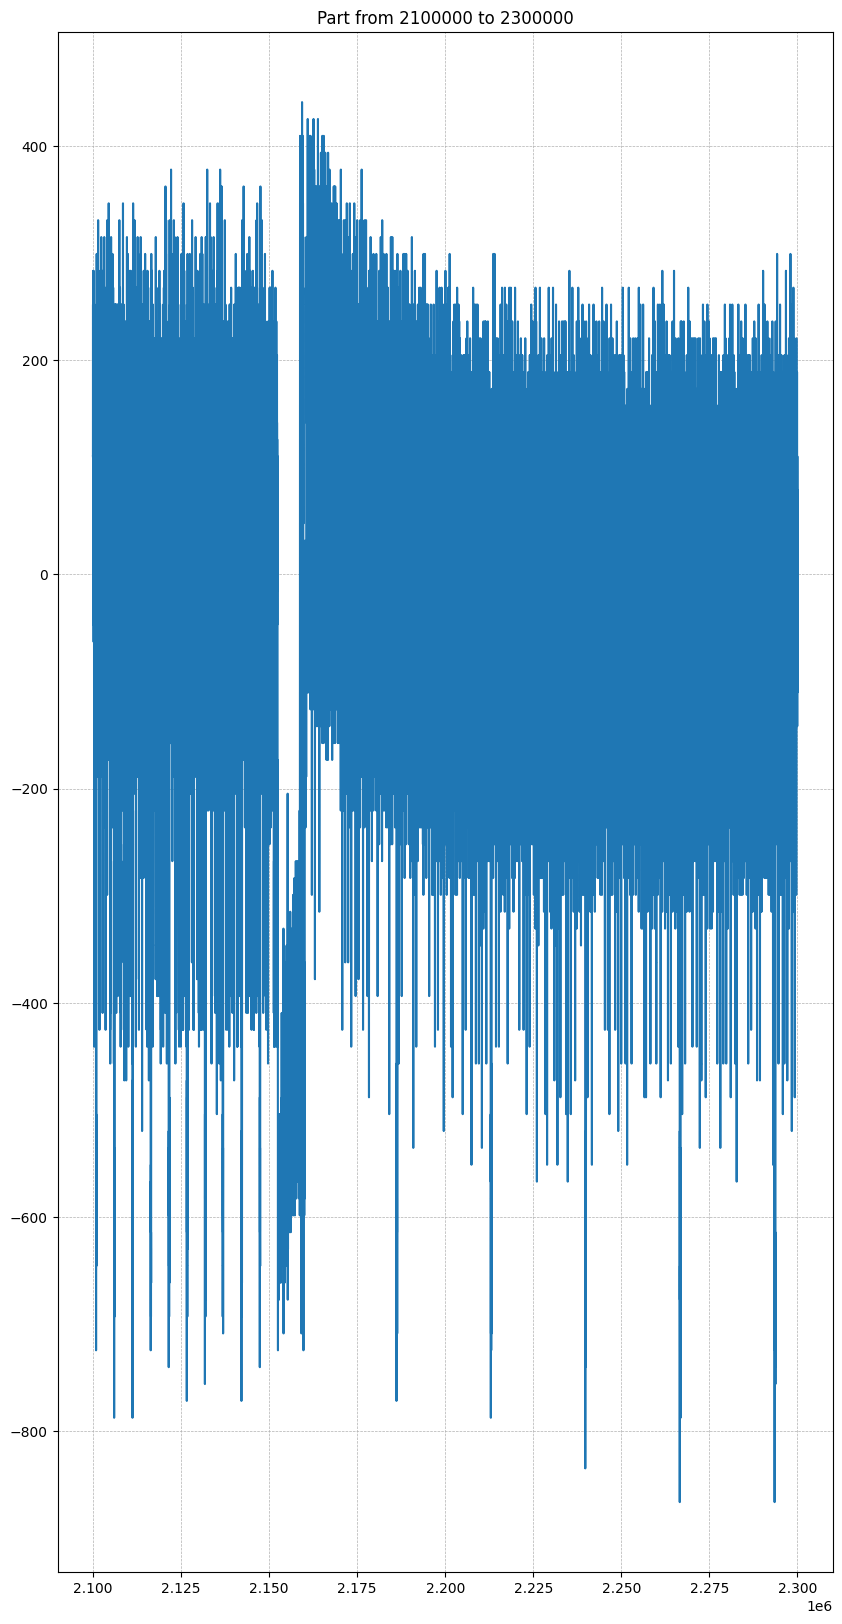

In [32]:
plot_part_curve(2100000,2300000,0)

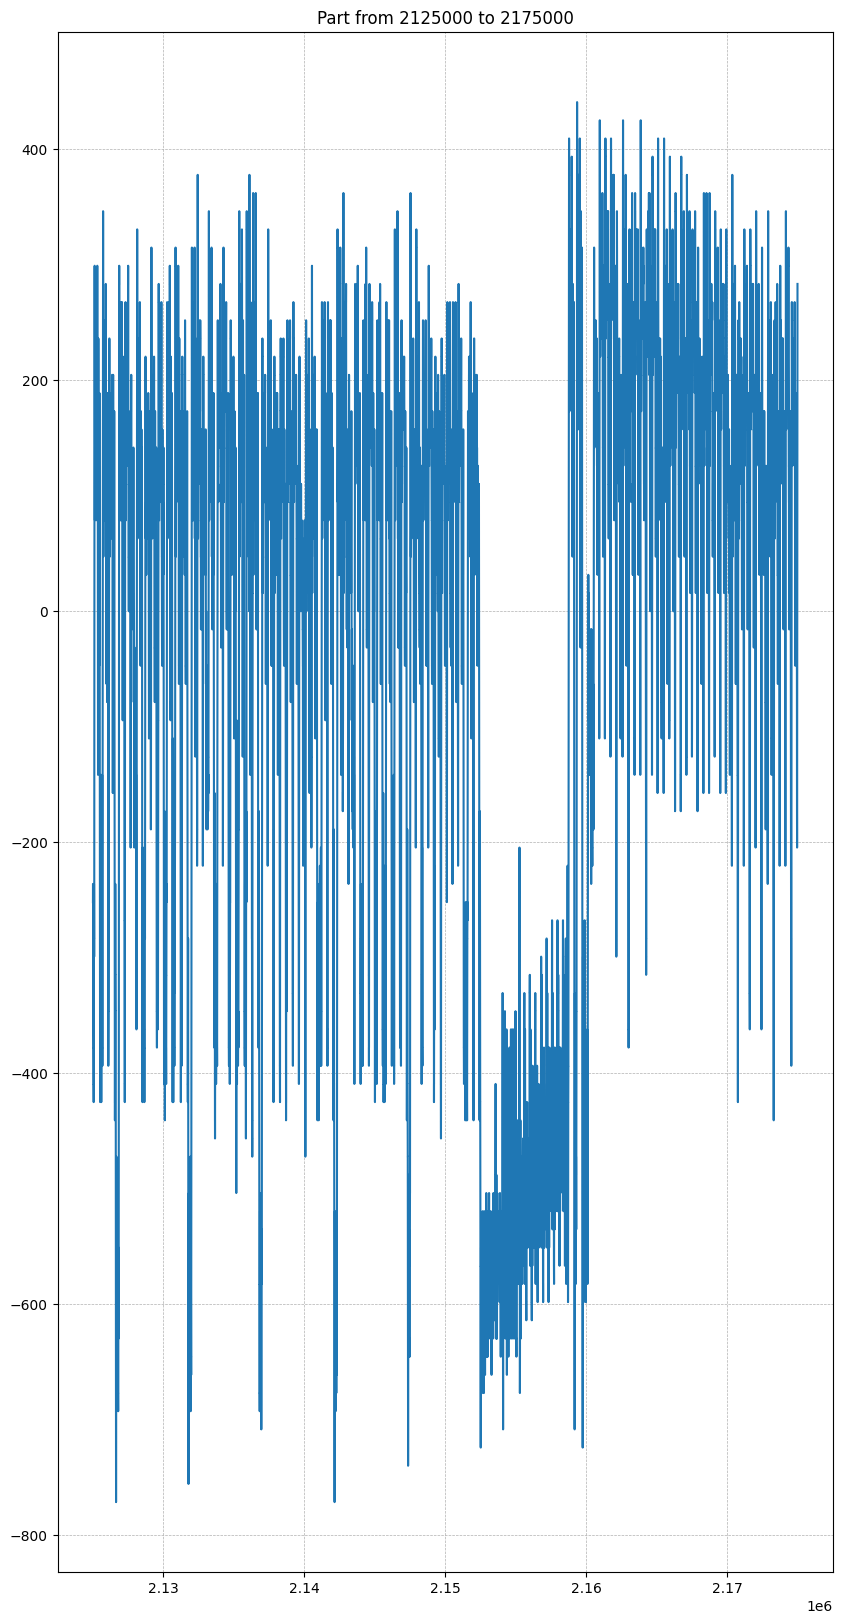

In [33]:
plot_part_curve(2125000,2175000,0)

所以基本确定结束时刻为大约为2153000

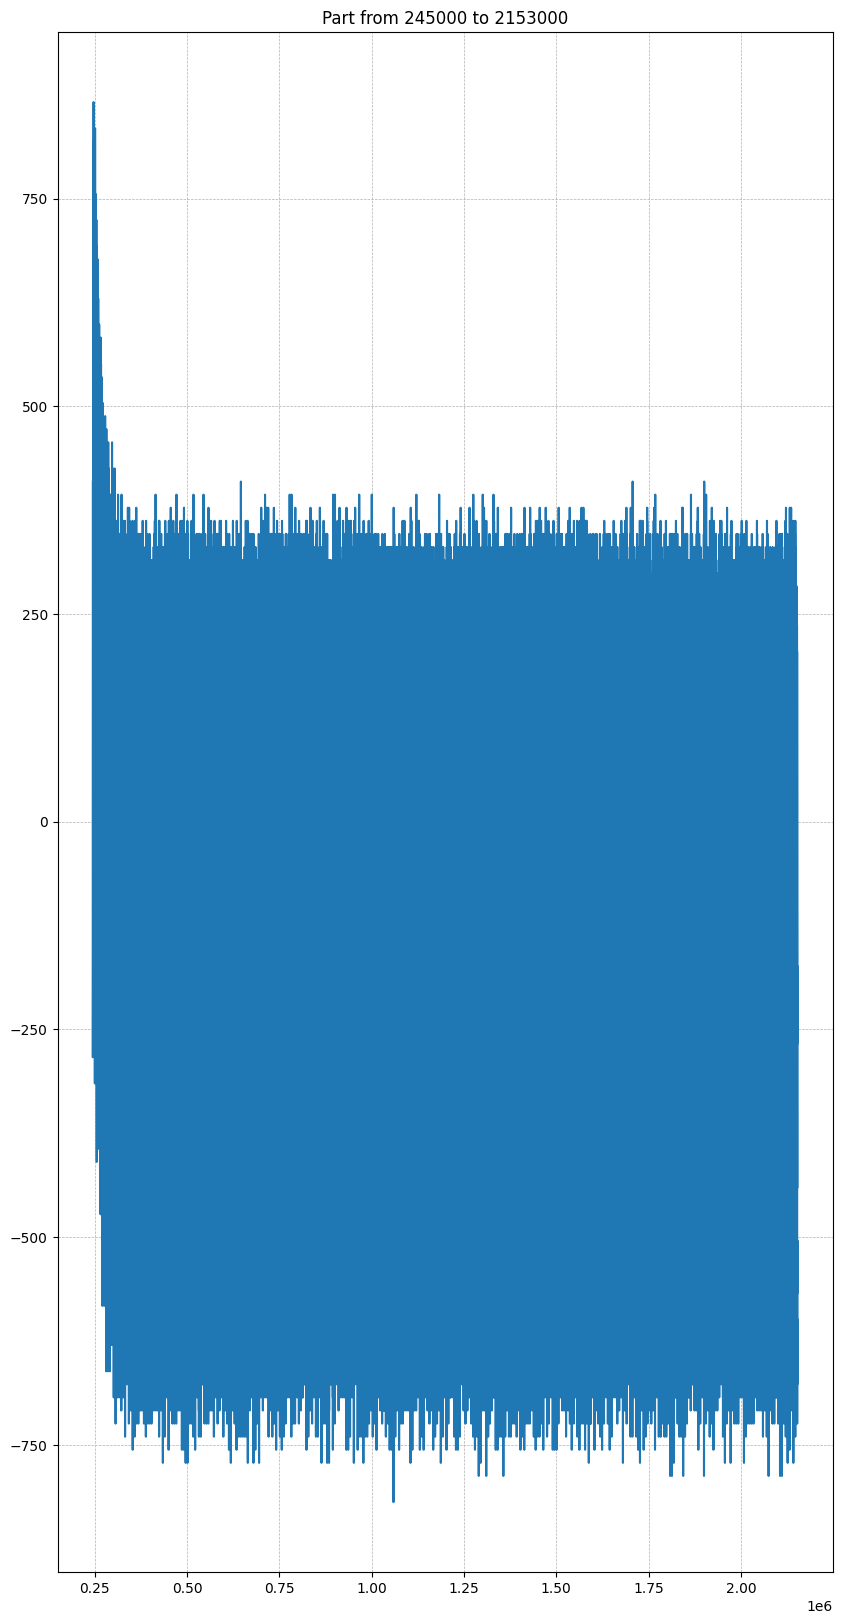

In [35]:
plot_part_curve(245000,2153000,0)

## 具体分析

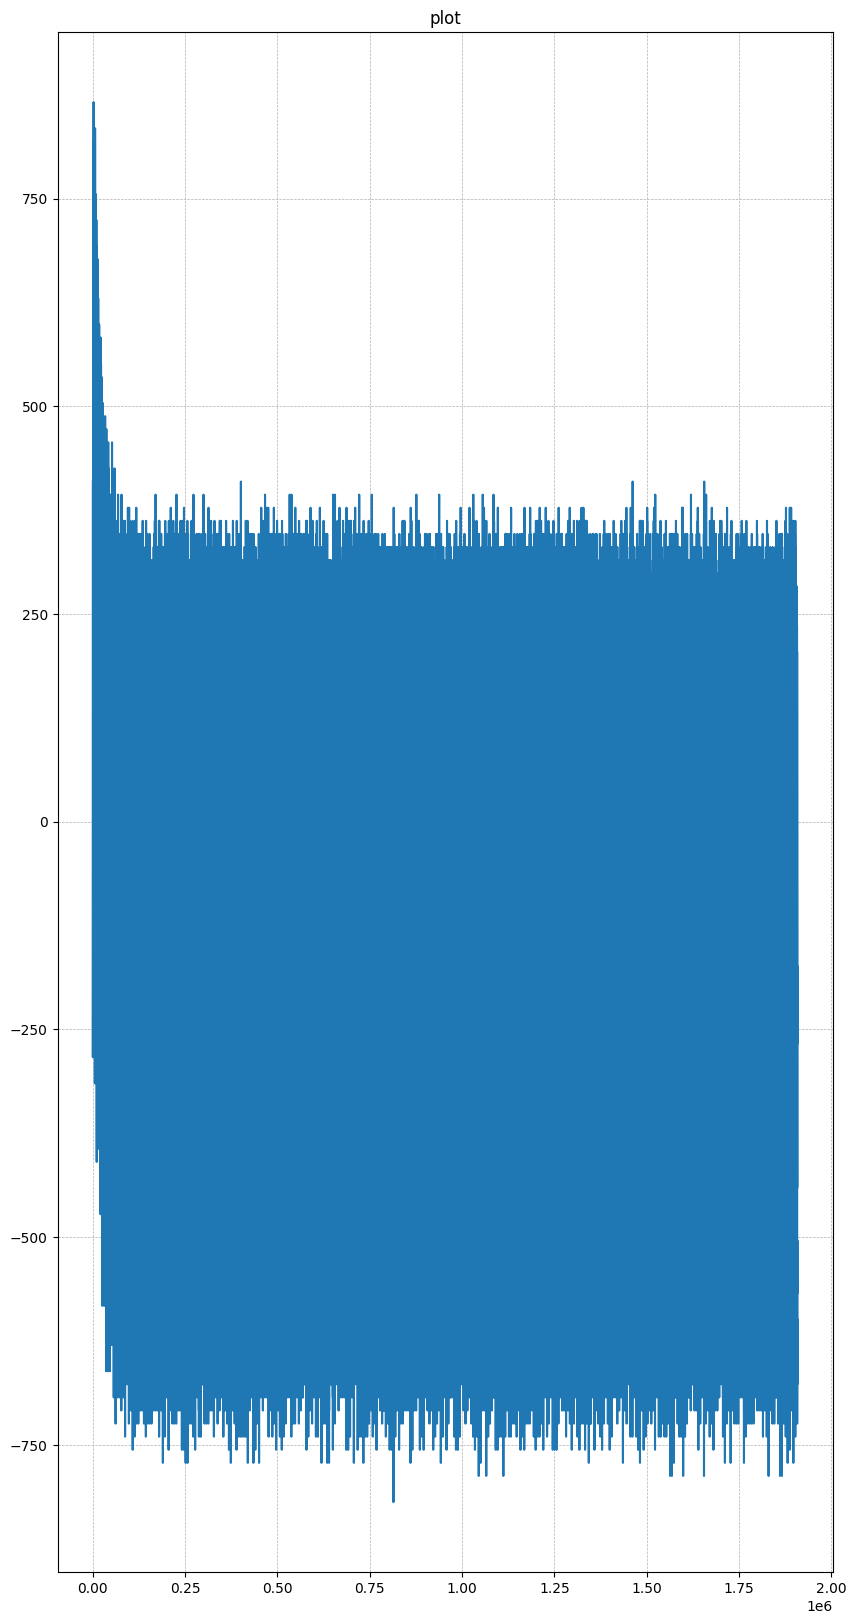

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('SM2.csv')

# 有效数据
#(245000,2153000)
x = range(1, 2153000-245000+1)
y = data.iloc[245000:2153000, 1]  # 只有一列数据，即纵坐标

fig, axes = plt.subplots(figsize=(10, 20), dpi=100)
axes.plot(x, y, linewidth=1.5)
axes.set_title(f'plot', fontsize=12)
axes.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

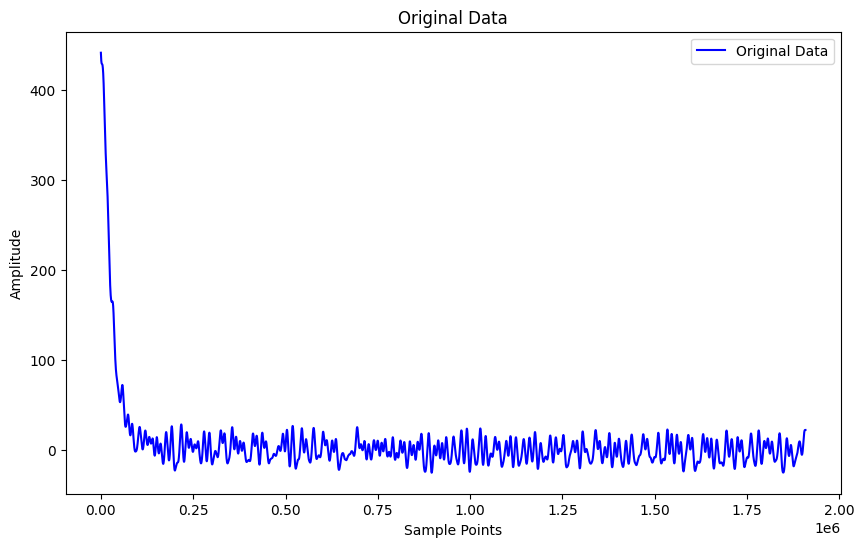

In [3]:
from scipy.signal import butter, filtfilt, savgol_filter
import matplotlib.pyplot as plt
# 定义低通滤波函数
def low_pass_filter(data, cutoff=0.000008, fs=0.1, order=3):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data
    
# 应用低通滤波
low_pass_filtered = low_pass_filter(y)

# 进行竖直方向的归一化
normalized_data = y - low_pass_filtered

# 绘制原始数据
plt.figure(figsize=(10, 6))
plt.plot(range(len(low_pass_filtered)), low_pass_filtered, label='Original Data', linewidth=1.5, color='blue')
plt.title('Original Data')
plt.xlabel('Sample Points')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


### 滤波处理

In [4]:
from scipy.signal import savgol_filter

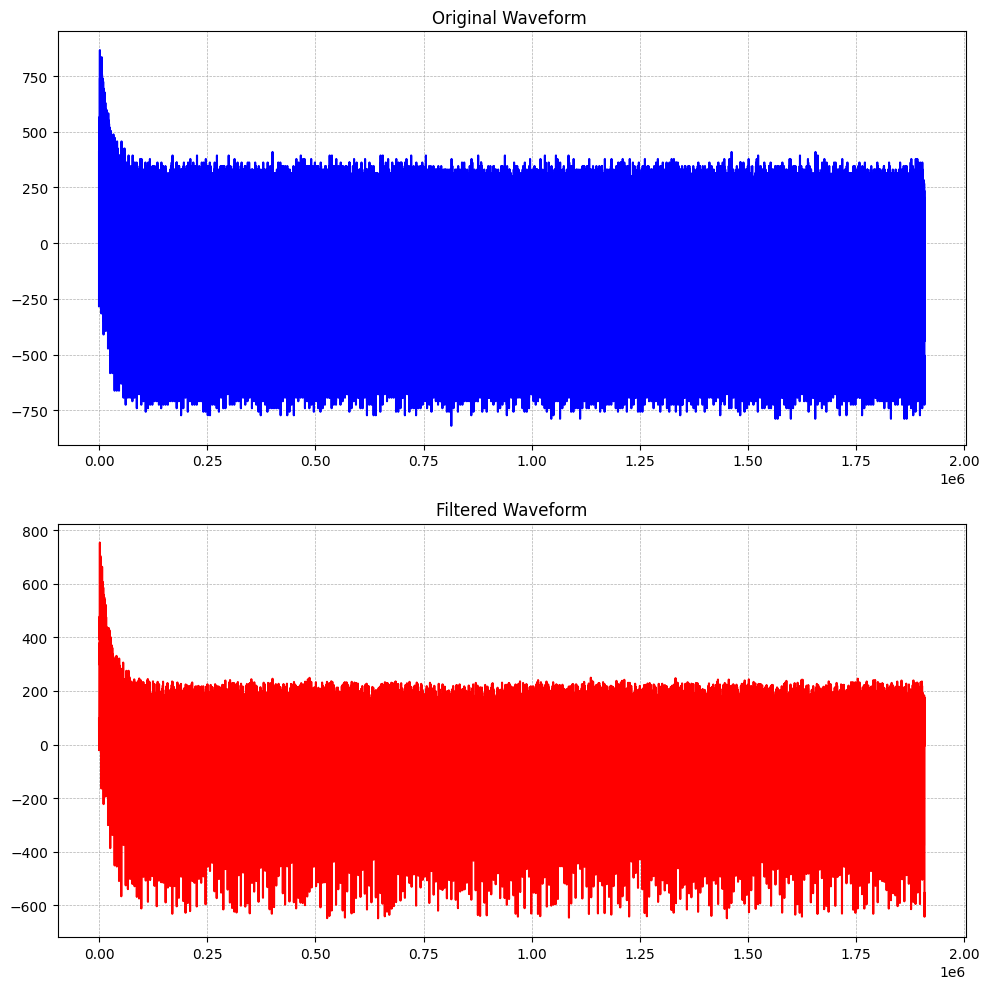

In [140]:
# 使用Savitzky-Golay滤波器进行平滑
# window_length 为奇数，polyorder 为多项式阶数
y0 = y
y_filtered = savgol_filter(y, window_length=501, polyorder=3)
y = y0

# 绘制原始波形和滤波后的波形
fig, axes = plt.subplots(2, 1, figsize=(10, 10), dpi=100)

# 原始波形
axes[0].plot(x, y, linewidth=1.5, color='blue')
axes[0].set_title(f'Original Waveform ', fontsize=12)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# 滤波后的波形
axes[1].plot(x, y_filtered, linewidth=1.5, color='red')
axes[1].set_title(f'Filtered Waveform', fontsize=12)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# 显示图像
plt.tight_layout()
plt.show()

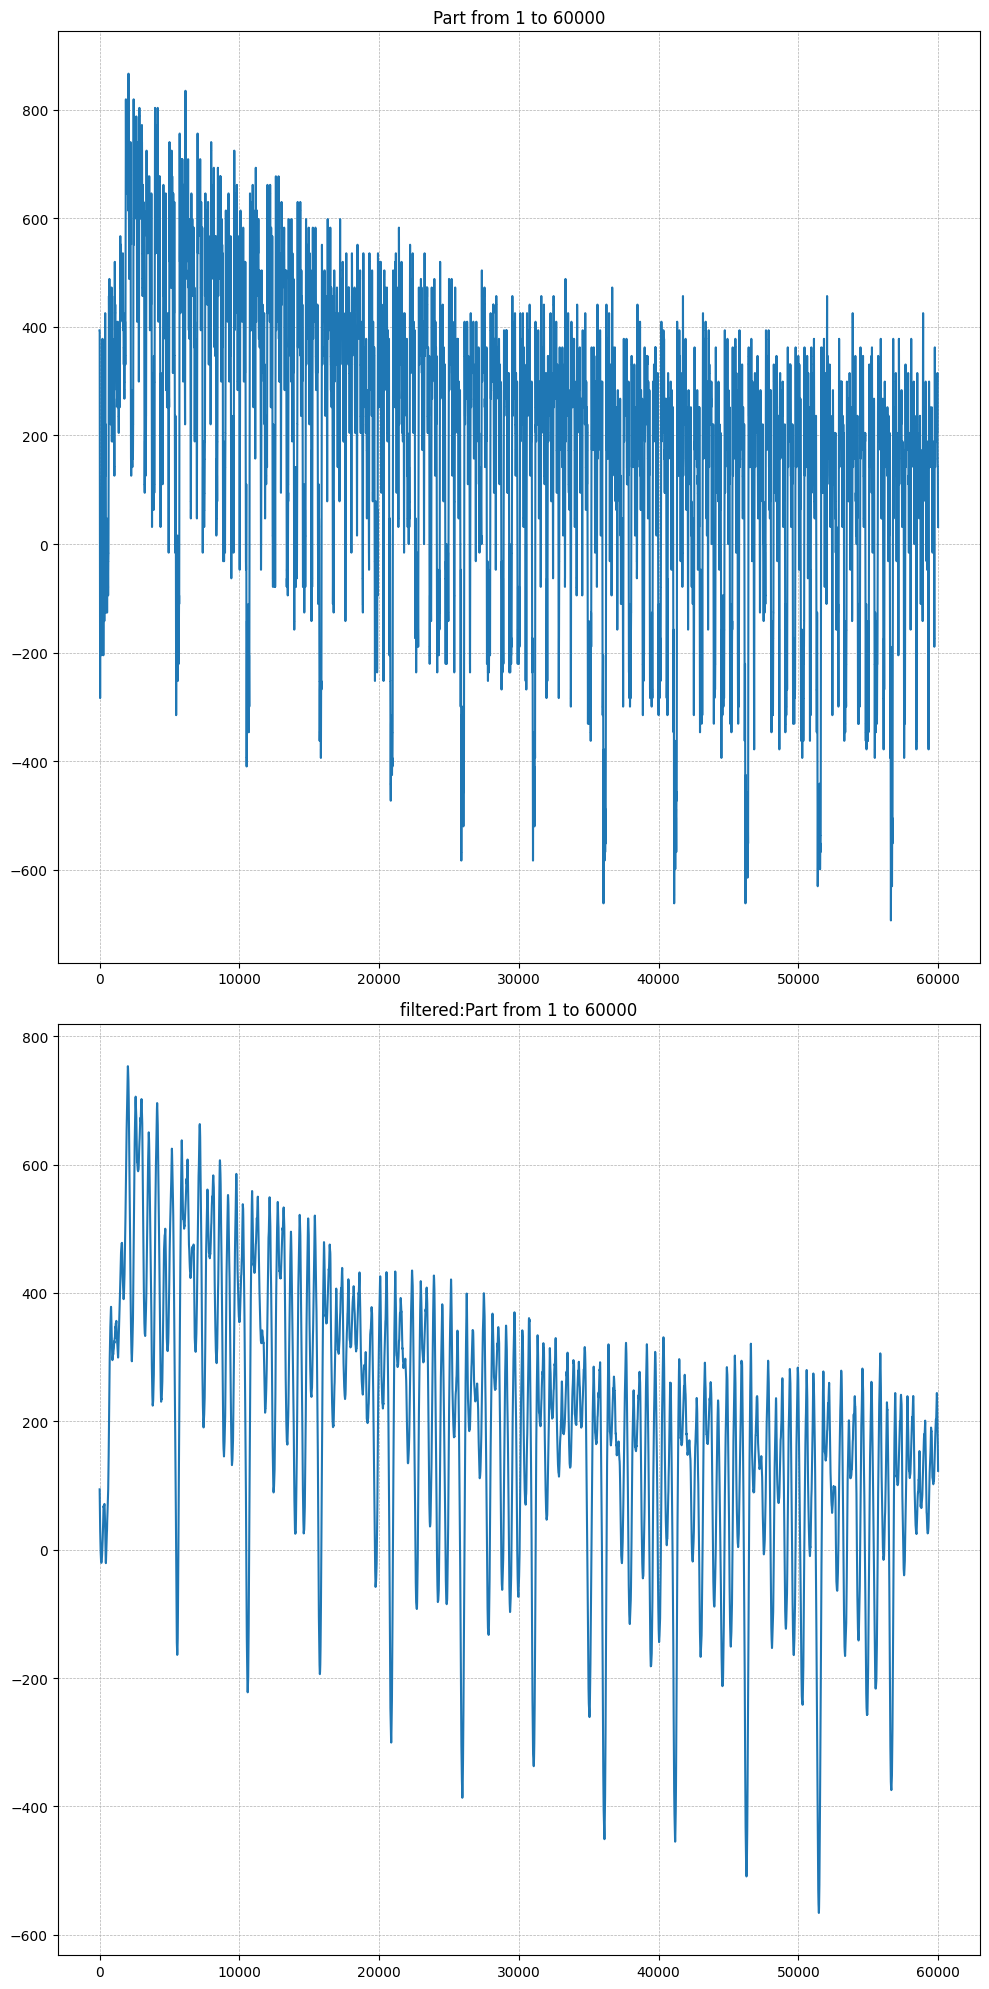

In [207]:
plot_part_curve(1,60000,1)

 需要说明的是，图像开始的地方选取得当，并给find_peeks函数指定间隔的最小值本问题就能正确地找到所有的下降极值决定的间隔

 需要归功于scipy的find_peeks函数：find_peaks() 函数在一维数组中寻找相对于其邻居高（或低）的点，即局部极大值（或极小值）。它会判断一个点是否在相邻点之间是相对极值，从而识别出真正的极值，而非两者之间的小波动。具体来说，函数会检测那些相邻左右都比它低的点。

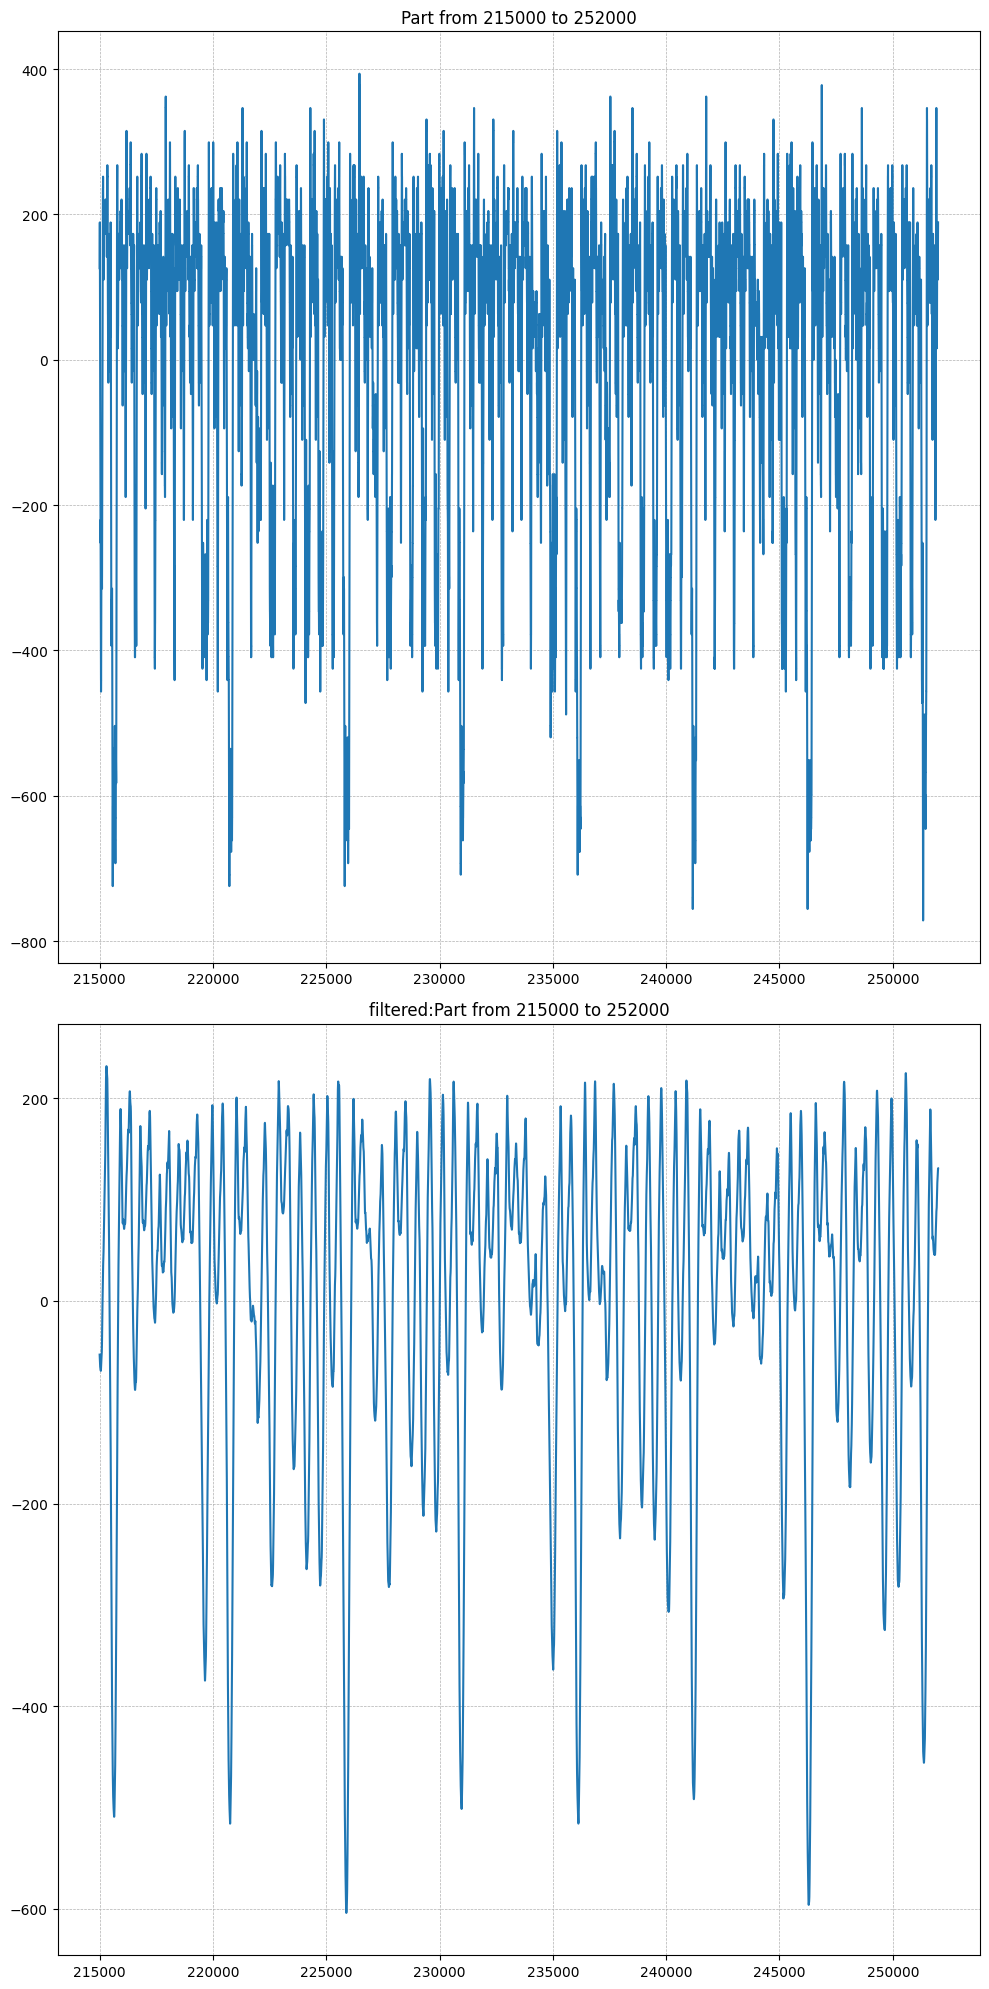

In [142]:
plot_part_curve(215000,252000,1)

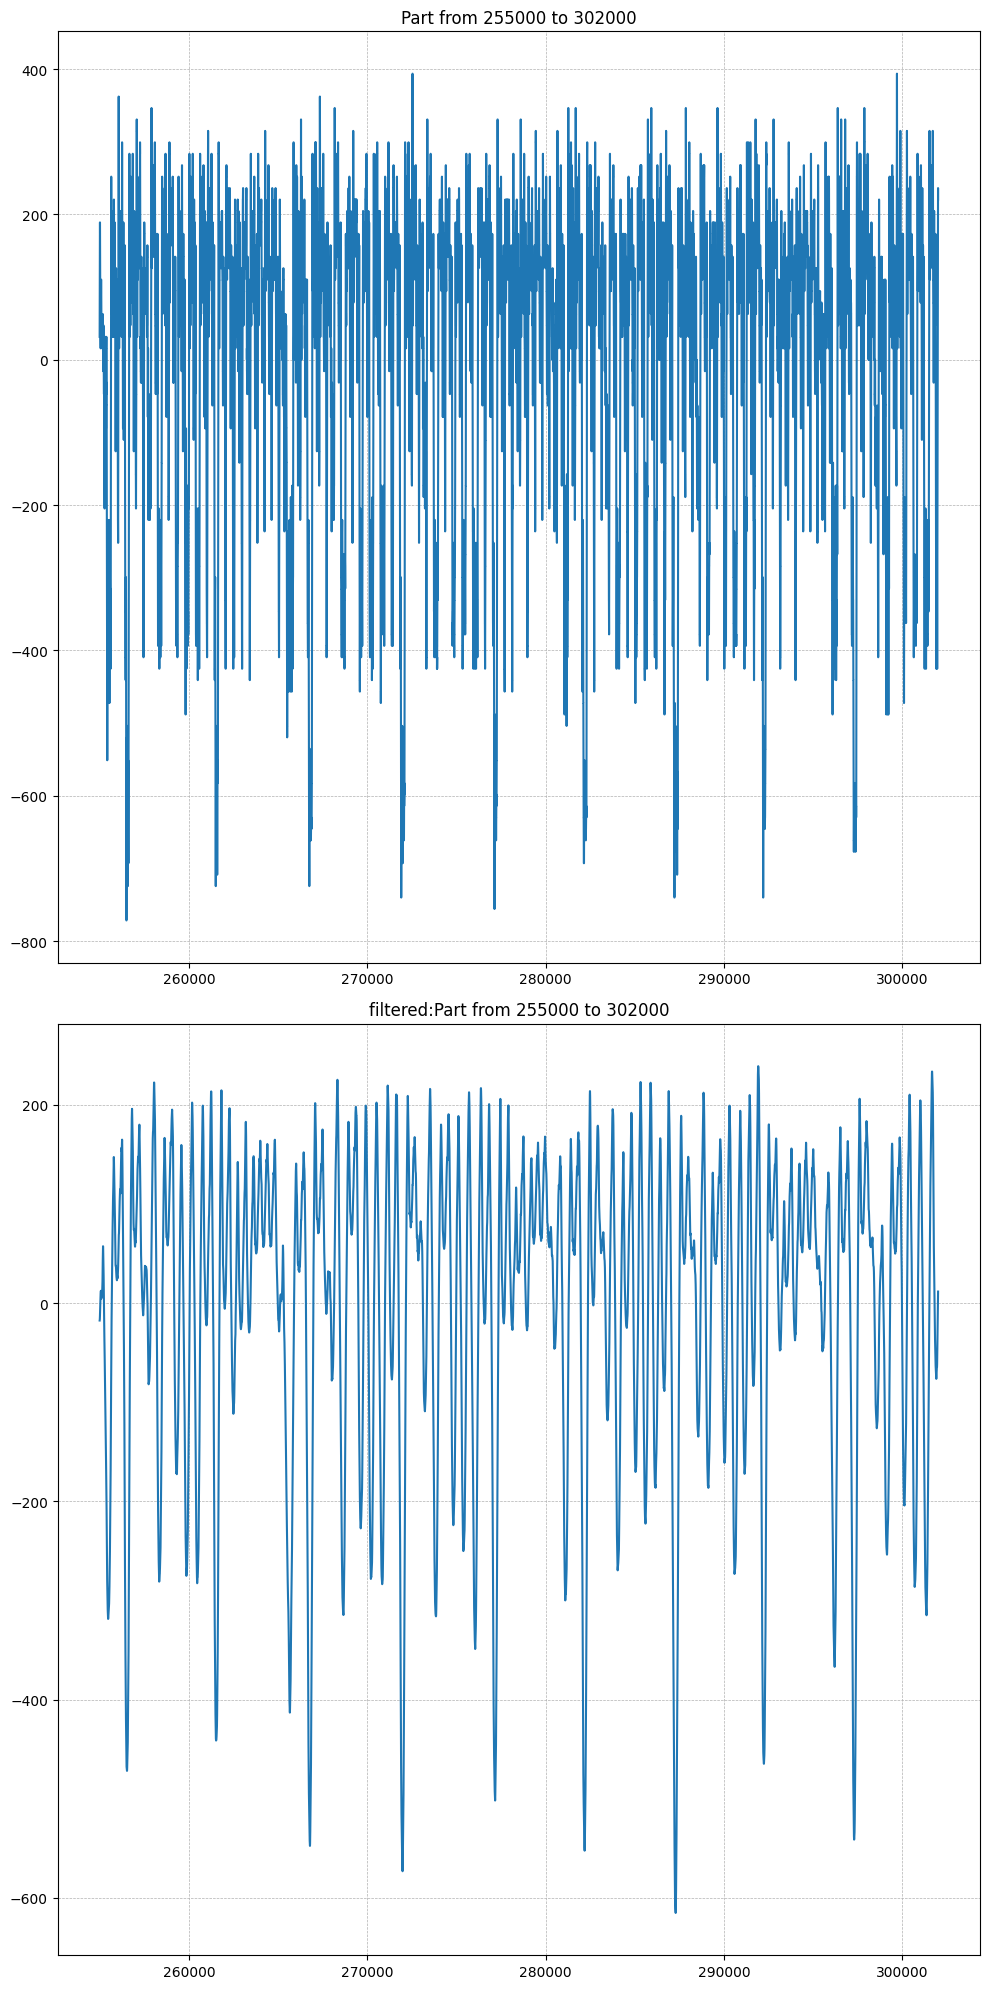

In [176]:
plot_part_curve(255000,302000,1)

In [4]:
from scipy.signal import find_peaks
import numpy as np

# 找到局部极小值（下峰）
inverted_y = -y_filtered
min_peaks, _ = find_peaks(inverted_y, distance=3000)  # 设定合适的间隔

# 检查周期长度是否保持相对恒定
cycle_lengths = np.diff(min_peaks)
print(f"Cycle lengths: {cycle_lengths}")
print(len(min_peaks))
min_peaks

NameError: name 'y_filtered' is not defined

In [362]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
# 将数据按局部极小值划分为周期，并分类
cycles = []
cycle_classes = []

max_peaks_indices, _ = find_peaks(y_filtered, distance=100)
max_peaks = y_filtered[max_peaks_indices]

min_distance=100
for i in range(len(min_peaks) - 1):
    # 当前极小值左右边界
    left_min_idx = min_peaks[i]
    right_min_idx = min_peaks[i + 1]




     # 找到左极小值右边的第一个极大值，确保它距离left_min_idx至少为min_distance
    right_max_idx_candidates = max_peaks_indices[ (max_peaks_indices < right_min_idx)&(max_peaks_indices > left_min_idx + min_distance) ]
    if len(right_max_idx_candidates) == 0:
        continue
    right_max_idx = right_max_idx_candidates[0]

    # 找到右极小值左边的第一个极大值，确保它距离right_min_idx至少为min_distance
    left_max_idx_candidates = max_peaks_indices[ (max_peaks_indices > left_min_idx)&(max_peaks_indices < right_min_idx - min_distance) ]
    if len(left_max_idx_candidates) == 0:
        continue
    left_max_idx = left_max_idx_candidates[-1]

    
    # # 找到左极小值右边的第一个极大值，确保它距离left_min_idx至少为min_distance
    # right_max_idx_candidates = max_peaks_indices[(max_peaks_indices > left_min_idx + min_distance) & (max_peaks_indices < right_min_idx)]
    # if len(right_max_idx_candidates) == 0:
    #     continue
    # right_max_idx = right_max_idx_candidates[0]

    # # 找到右极小值左边的第一个极大值，确保它距离right_min_idx至少为min_distance
    # left_max_idx_candidates = max_peaks_indices[(max_peaks_indices < right_min_idx - min_distance) & (max_peaks_indices > left_min_idx)]
    # if len(left_max_idx_candidates) == 0:
    #     continue
    # left_max_idx = left_max_idx_candidates[-1]

    # 截取周期
    cycle = y_filtered[right_max_idx:left_max_idx]
    cycles.append(cycle)

# for i in range(len(min_peaks) - 1):
#     # 获取每个周期的波形数据
#     cycle = y_filtered[min_peaks[i]:min_peaks[i+1]]
#     cycles.append(cycle)

def plot_cycle4(idt):
    x=range(1,(min_peaks[i + 1]-min_peaks[i]) + 1)
    y= y_filtered[min_peaks[i]:min_peaks[i+1]]
    fig, axes = plt.subplots(figsize=(10, 20), dpi=100)
    axes.plot(x, y, linewidth=1.5)
    axes.set_title(f'Cycle {idt} ', fontsize=12)
    axes.grid(True, which='both', linestyle='--', linewidth=0.5)

def plot_cycle0(cycle_index):
    if cycle_index < 0 or cycle_index >= len(min_peaks) - 1:
        print("Invalid cycle index.")
        return
    
    # Get the x and y values based on the specified cycle index
    x = range(1, (min_peaks[cycle_index + 1] - min_peaks[cycle_index]) + 1)
    y = y_filtered[min_peaks[cycle_index]:min_peaks[cycle_index + 1]]
    
    fig, axes = plt.subplots(figsize=(10, 20), dpi=100)
    axes.plot(x, y, linewidth=1.5)
    axes.set_title(f'Cycle {cycle_index} ', fontsize=12)
    axes.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

#选择第几个周期
def plot_cycle(idt):
    x=range(1,len(cycles[idt]) + 1)
    y=cycles[idt]
    fig, axes = plt.subplots(figsize=(10, 20), dpi=100)
    axes.plot(x, y, linewidth=1.5)
    axes.set_title(f'Cycle {idt} ', fontsize=12)
    axes.grid(True, which='both', linestyle='--', linewidth=0.5)

#选择第几个周期
def plot_cycle2(idt):
    x=range(1,len(normalized_cycles[idt]) + 1)
    y=normalized_cycles[idt]
    fig, axes = plt.subplots(figsize=(10, 20), dpi=100)
    axes.plot(x, y, linewidth=1.5)
    axes.set_title(f'Cycle {idt} ', fontsize=12)
    axes.grid(True, which='both', linestyle='--', linewidth=0.5)

In [261]:
# 检查周期长度是否保持相对恒定

for i, cycle in enumerate(cycles):
    print(f"Cycle {i} length: {len(cycle)}")

Cycle 0 length: 4354
Cycle 1 length: 4367
Cycle 2 length: 4491
Cycle 3 length: 4472
Cycle 4 length: 4451
Cycle 5 length: 4457
Cycle 6 length: 4473
Cycle 7 length: 4416
Cycle 8 length: 4455
Cycle 9 length: 4473
Cycle 10 length: 4549
Cycle 11 length: 4470
Cycle 12 length: 4432
Cycle 13 length: 4481
Cycle 14 length: 4596
Cycle 15 length: 4443
Cycle 16 length: 4477
Cycle 17 length: 4479
Cycle 18 length: 4444
Cycle 19 length: 4407
Cycle 20 length: 4537
Cycle 21 length: 4441
Cycle 22 length: 4425
Cycle 23 length: 4526
Cycle 24 length: 4443
Cycle 25 length: 4450
Cycle 26 length: 4407
Cycle 27 length: 4517
Cycle 28 length: 4526
Cycle 29 length: 4457
Cycle 30 length: 4479
Cycle 31 length: 4457
Cycle 32 length: 4455
Cycle 33 length: 4451
Cycle 34 length: 4429
Cycle 35 length: 4376
Cycle 36 length: 4510
Cycle 37 length: 4448
Cycle 38 length: 4452
Cycle 39 length: 4539
Cycle 40 length: 4492
Cycle 41 length: 4511
Cycle 42 length: 4508
Cycle 43 length: 4486
Cycle 44 length: 4421
Cycle 45 length: 454

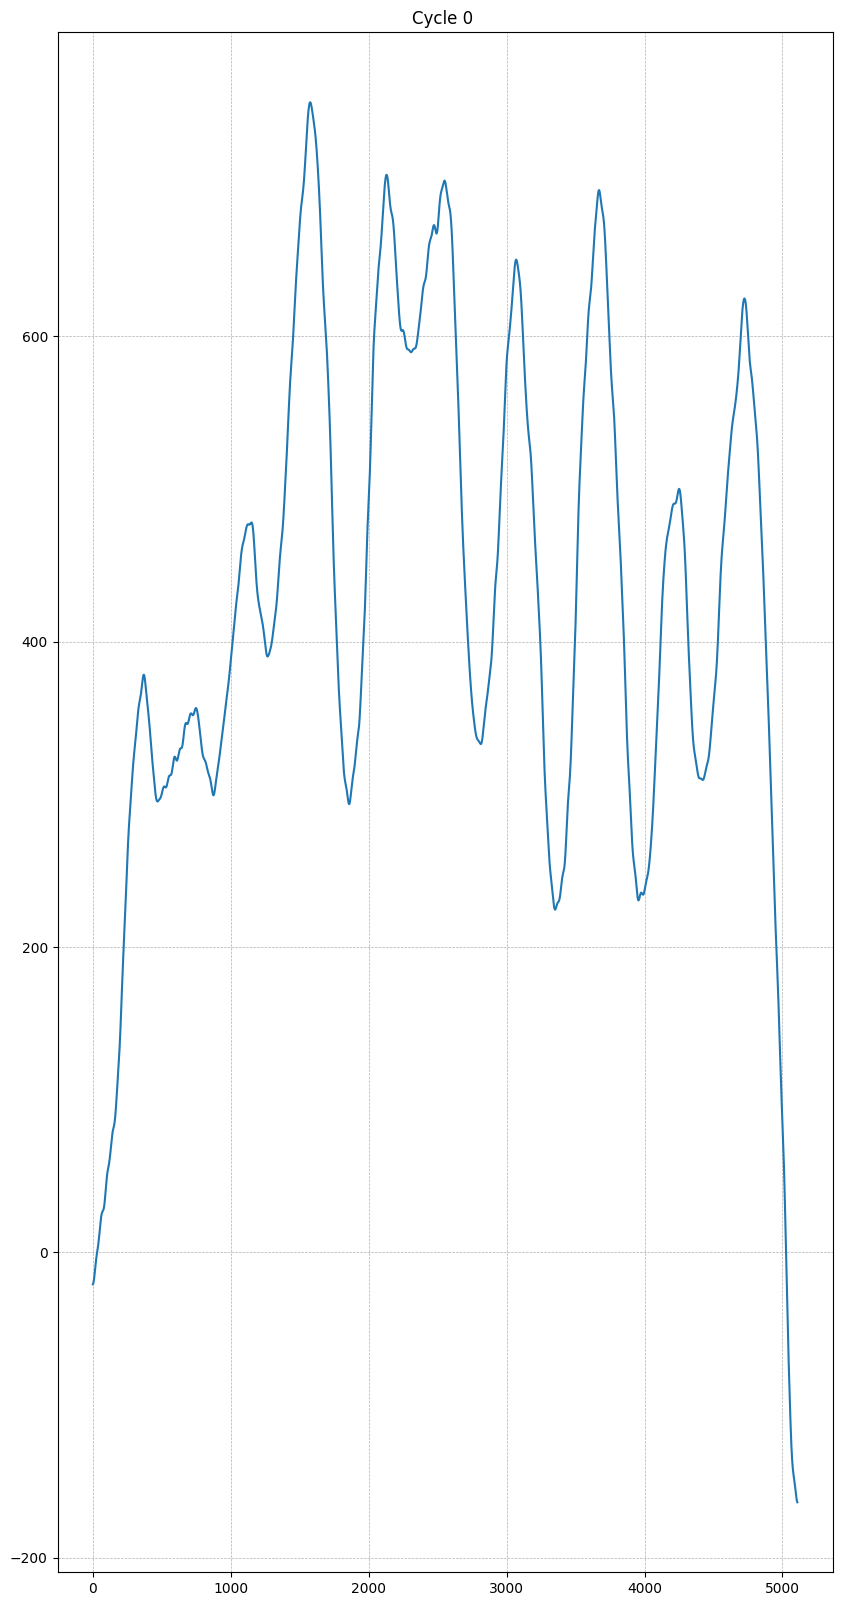

In [364]:
plot_cycle0(0)

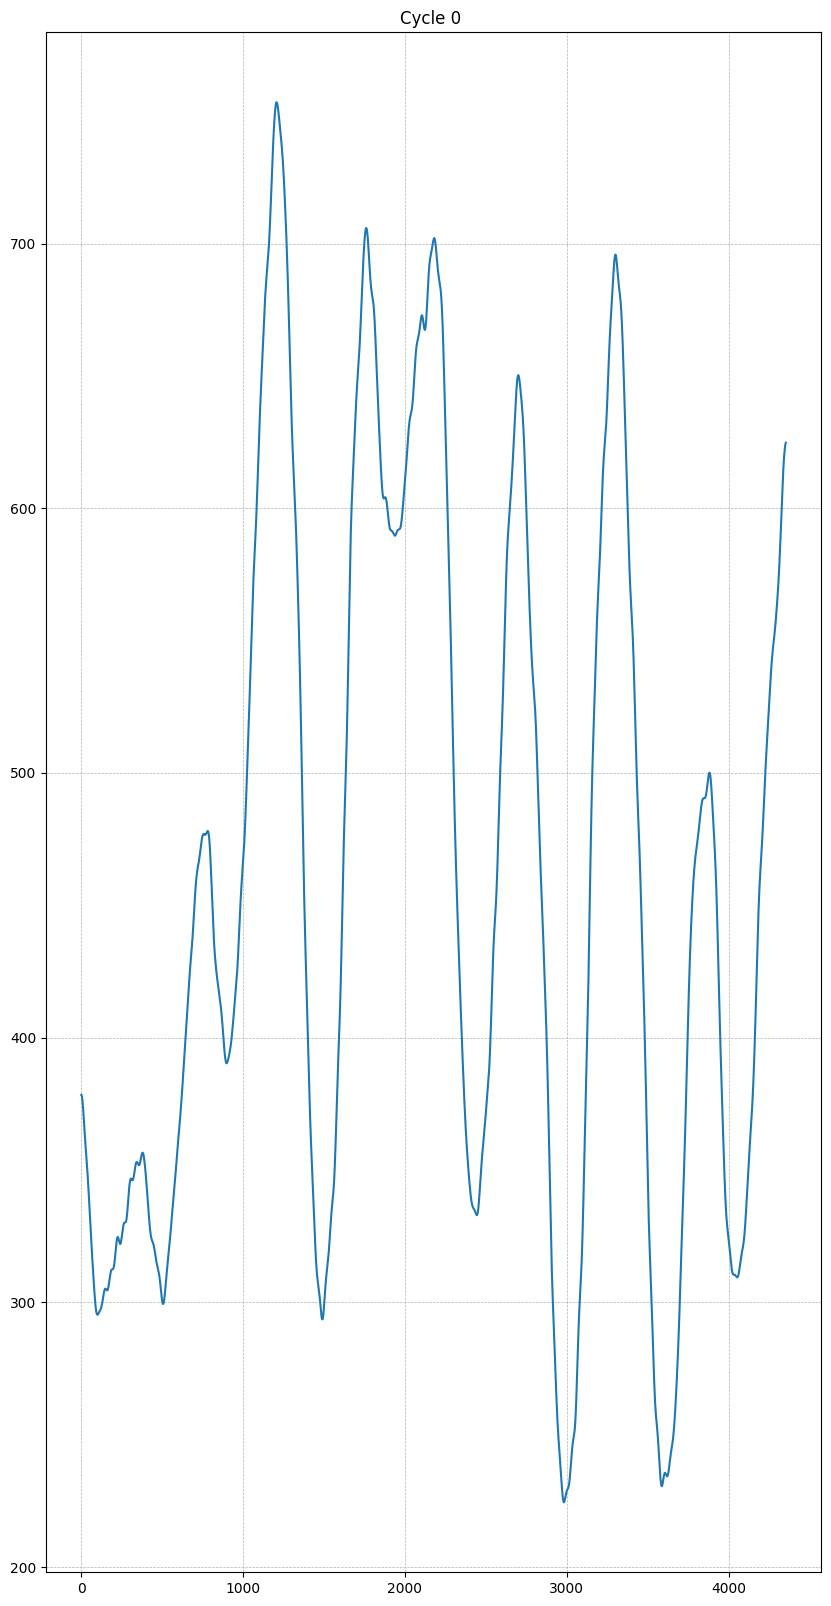

In [355]:
plot_cycle(0)

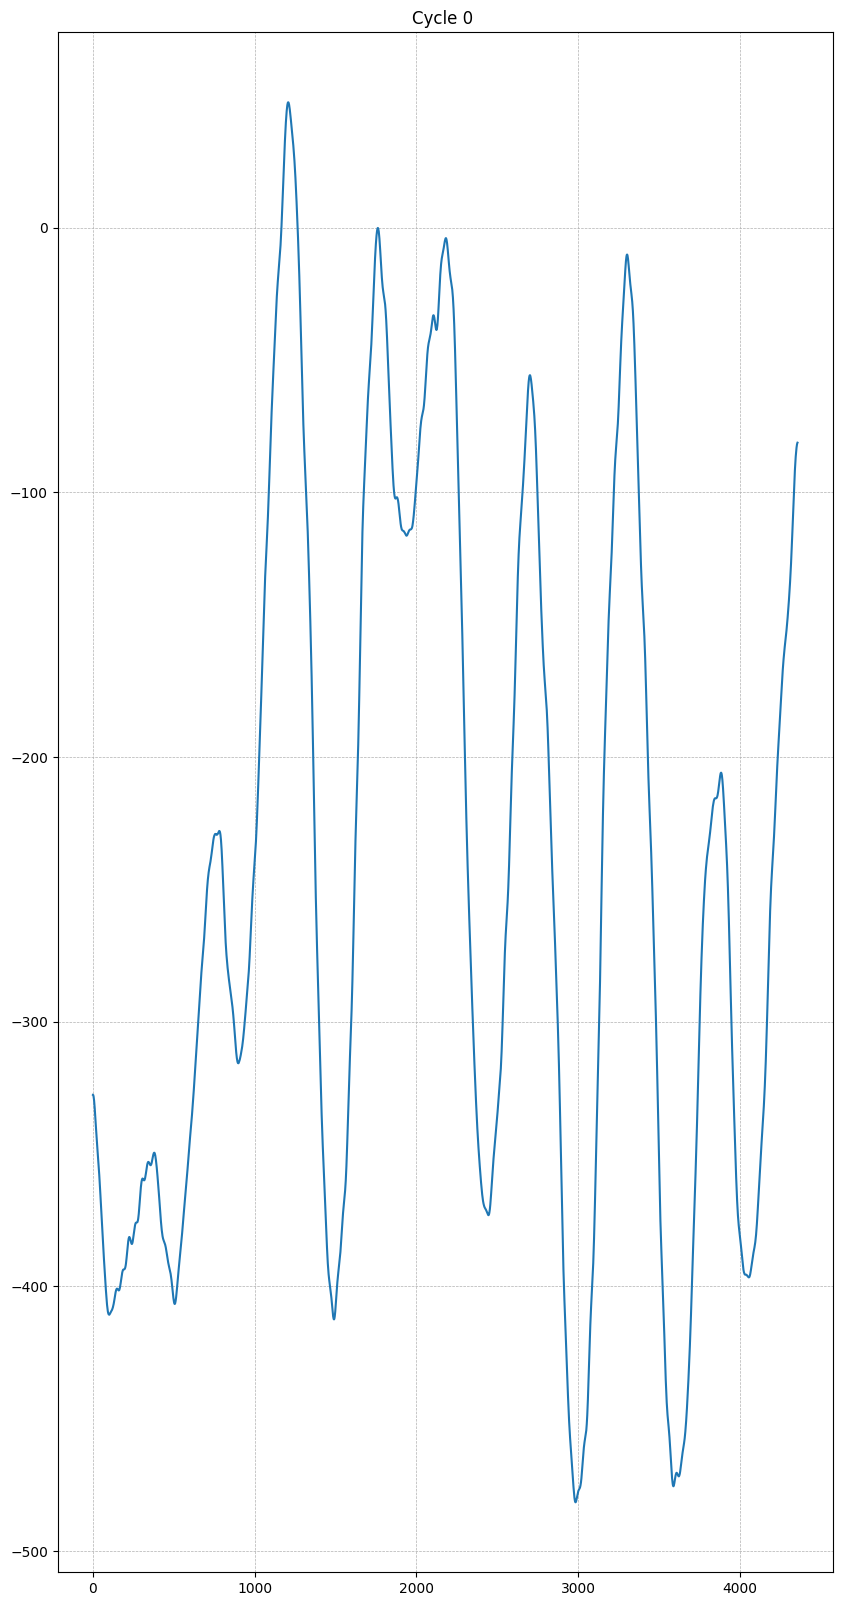

In [360]:
plot_cycle2(0)

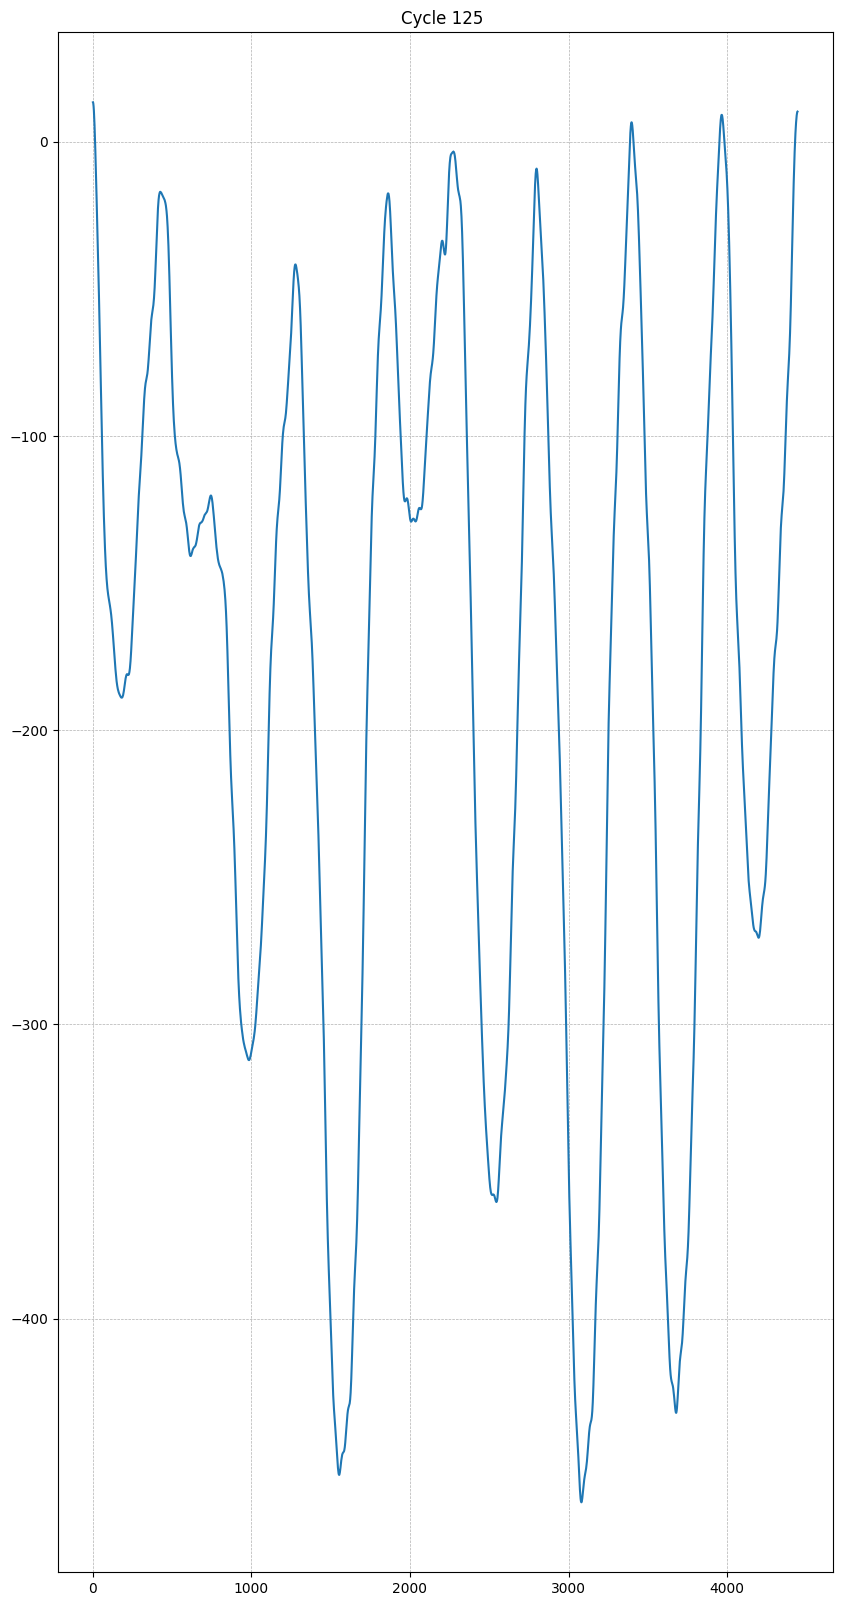

In [365]:
plot_cycle2(125)

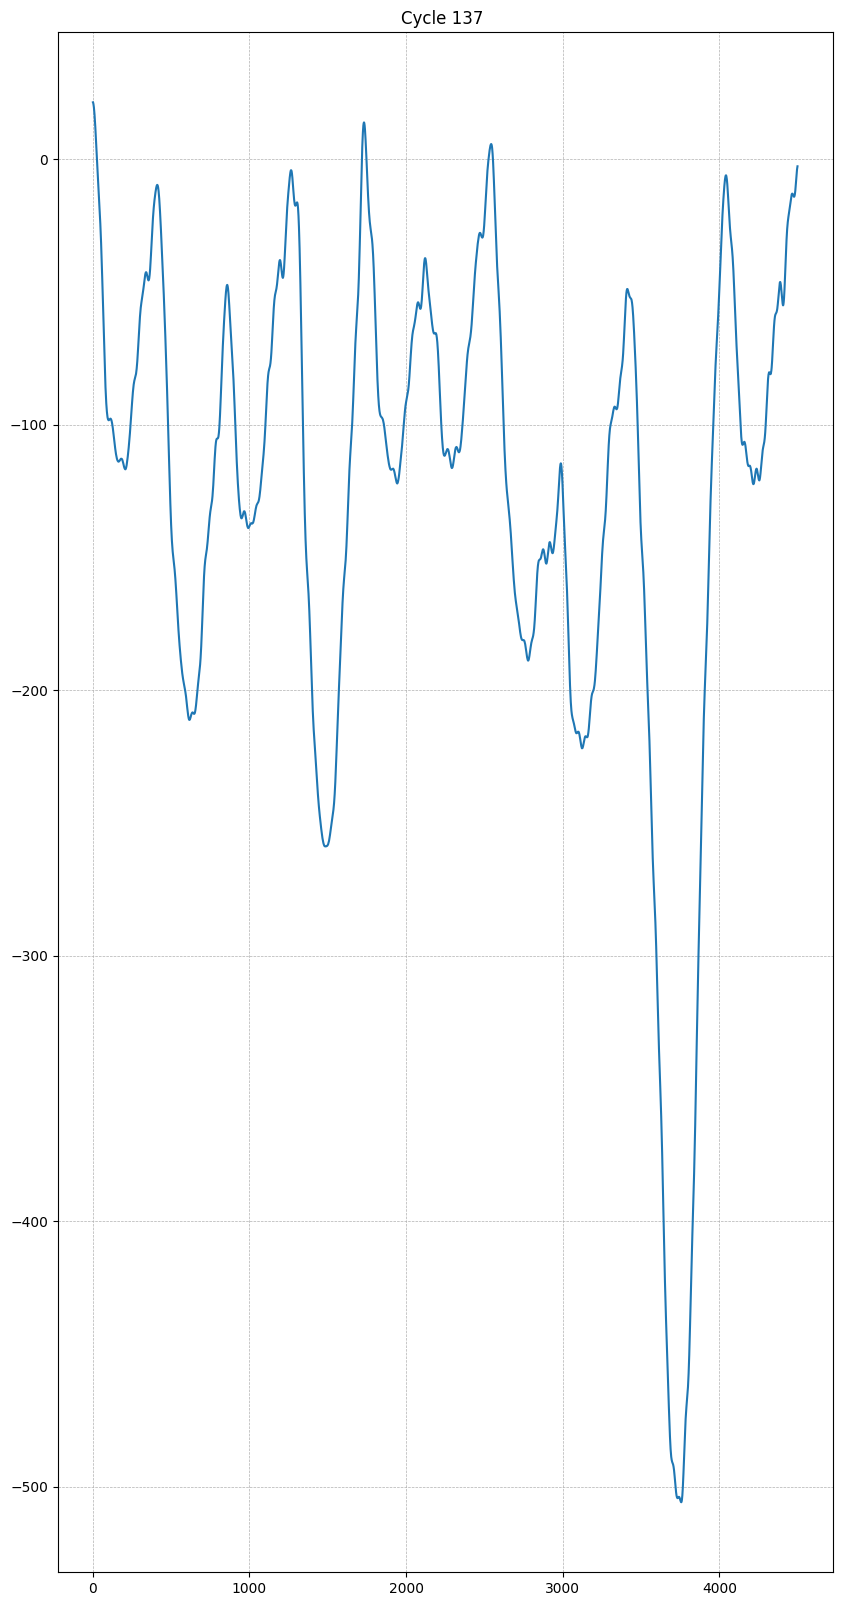

In [377]:
plot_cycle2(137)

In [ ]:
# 数据归一化

In [171]:
# 对每个周期进行归一化，避免开始时高度的偏高带来的影响
normalized_cycles = []

reference_value = 0  # 定义一个基准值，所有周期的前3个最大值的平均值将对齐到这个值

for cycle in cycles:
    # 找到周期内的所有局部极大值
    max_peaks, _ = find_peaks(cycle)
    
    # 如果极大值少于5个，直接使用所有的极大值
    if len(max_peaks) >= 5:
        top_3_max_values = np.sort(cycle[max_peaks])[-5:]  # 取出最大的5个极大值
    else:
        top_3_max_values = cycle[max_peaks]  # 取出所有极大值
    
    # 计算前3个最大值的平均值
    avg_top_3 = np.mean(top_3_max_values)
    
    # 计算平移量，使得前3个最大值的平均值对齐到 reference_value
    shift_amount = reference_value - avg_top_3
    
    # 对周期进行平移
    normalized_cycle = cycle + shift_amount
    normalized_cycles.append(normalized_cycle)


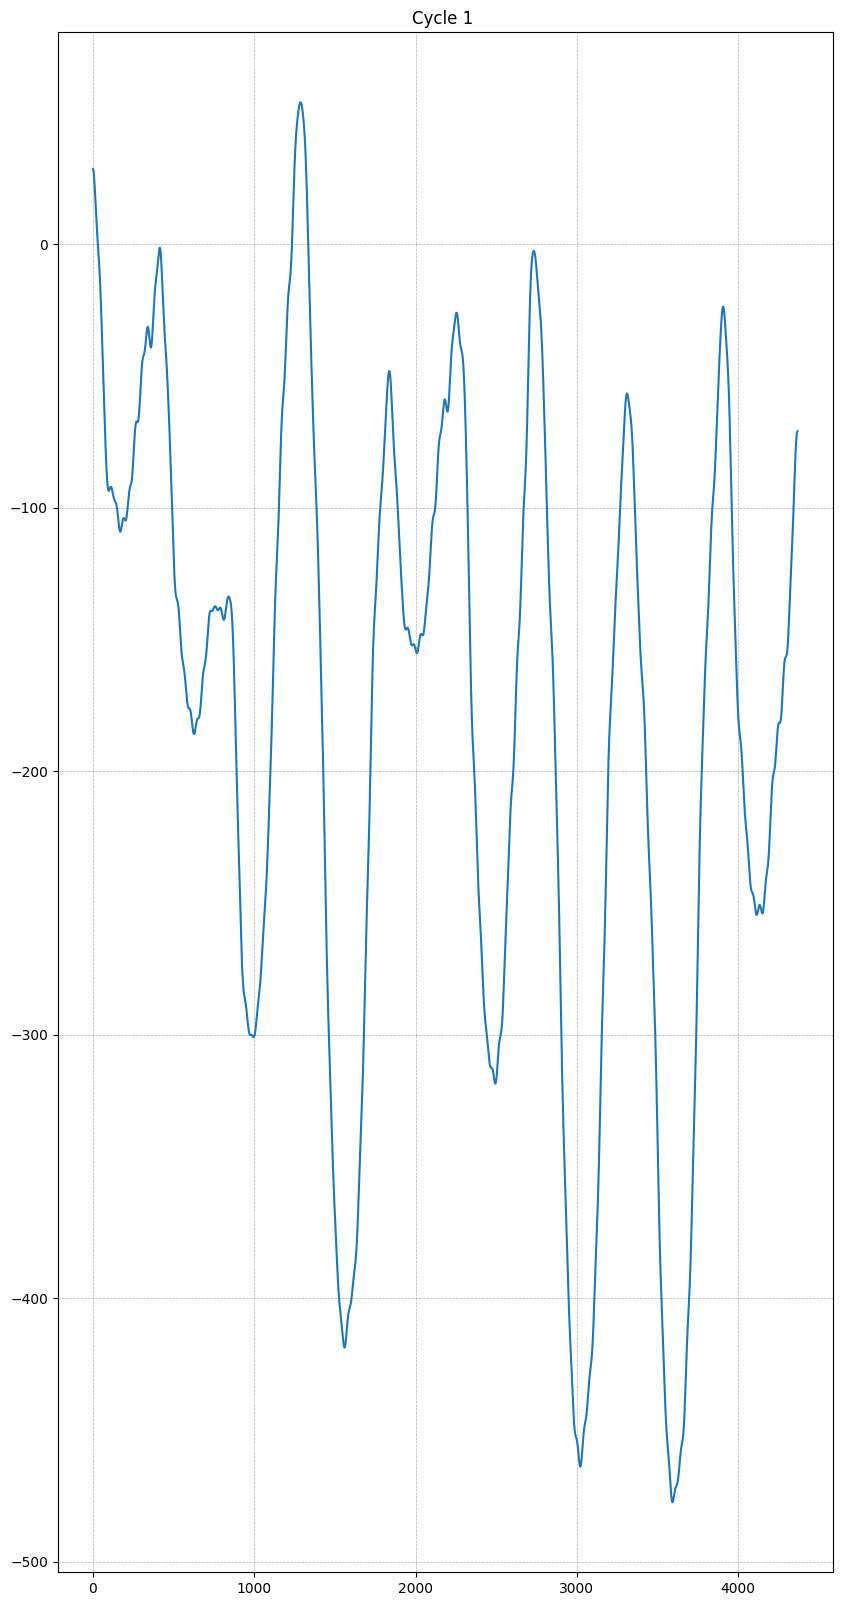

In [172]:
plot_cycle2(1)

观察波形发现，通过每个周期内部的最小值和第二小值的差值的大小，可以有效地区分两类周期波形

In [347]:
# 存储每个周期内的最小峰值平均值
cycle_avg_min_values = []

# # 遍历每个周期（由全局极小值 min_peaks 划分）
# for i in range(len(min_peaks) - 1):
   
#     # 在这个周期范围内寻找局部极小值
#     local_min_peaks, _ = find_peaks(-normalized_cycles[i], distance=100)  # 设置合适的最小间隔
    
#     # 获取局部极小值对应的值
#     local_min_values = normalized_cycles[i][local_min_peaks]
    
#     # 计算该周期内所有局部极小值的平均值
#     if len(local_min_values) > 0:  # 确保有极小值
#         avg_min_value = np.mean(local_min_values)
#     else:
#         avg_min_value = np.nan  # 如果没有局部极小值，则返回 NaN
    
#     # 存储结果
#     cycle_avg_min_values.append(avg_min_value)

# # 输出每个周期的平均极小值
# for idx, avg_min_value in enumerate(cycle_avg_min_values):
#     print(f'第 {idx} 个周期的局部极小值的平均值是: {avg_min_value}')

# 遍历每个周期（由全局极小值 min_peaks 划分）
for i in range(len(min_peaks) - 1):
   
    # 在这个周期范围内寻找局部极小值
    local_min_peaks, _ = find_peaks(-normalized_cycles[i], distance=200)  # 设置合适的最小间隔
    
    # 获取局部极小值对应的值
    local_min_values = normalized_cycles[i][local_min_peaks]
    
   # 对局部极小值进行排序
    sorted_min_values = np.sort(local_min_values)



    # 去除最大值
    sorted_min_values = sorted_min_values[:-1]  # 去掉最后一个（最大值）
    
    # 计算平方和
    square_sum = sum(val ** 2 for val in sorted_min_values)


    
    
    # 存储结果
    cycle_avg_min_values.append(square_sum)



# result = []
# n_0=0
# n_1=0
# for i in cycle_avg_min_values:
#     if i >= 160:
#         result.append(1)
#         n_1+=1
#     else:
#         result.append(0)
#         n_0+=1



from sklearn.cluster import KMeans
import numpy as np

# 将 cycle_avg_min_values 转为 numpy 数组
cycle_avg_min_values_np = np.array(cycle_avg_min_values)

# 提取有效的（非 NaN）数据
valid_indices = ~np.isnan(cycle_avg_min_values_np)
valid_avg_min_values = cycle_avg_min_values_np[valid_indices]

# 使用 KMeans 聚类，将有效数据分为两类
kmeans = KMeans(n_clusters=2, random_state=20)
kmeans.fit(valid_avg_min_values.reshape(-1, 1))

# 获取聚类结果标签
labels = kmeans.labels_

# 获取聚类中心，较大的类对应 0，较小的类对应 1
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:", cluster_centers)

# 判断哪个类对应较大的值，哪个类对应较小的值
if cluster_centers[0] > cluster_centers[1]:
    large_class_label = 0
    small_class_label = 1
else:
    large_class_label = 1
    small_class_label = 0

# 初始化结果列表，保持与原始 cycle_avg_min_values 长度一致
result = [None] * len(cycle_avg_min_values)

# 根据有效数据的聚类结果，将分类结果插入原始位置
n_0 = 0  # 对应较大的类
n_1 = 0  # 对应较小的类

for idx, label in zip(np.where(valid_indices)[0], labels):
    if label == large_class_label:
        result[idx] = 0
        n_0 += 1
    else:
        result[idx] = 1
        n_1 += 1

# 输出分类结果统计
print(f"Number of '0' class (larger values): {n_0}")
print(f"Number of '1' class (smaller values): {n_1}")

# 输出聚类结果和分类
for i, value in enumerate(cycle_avg_min_values):
    if result[i] is not None:
        print(f"Cycle {i}: Avg Min Value = {value}, Classified as {result[i]}")
    else:
        print(f"Cycle {i}: Avg Min Value = NaN, Not Classified")



Cluster Centers: [[1070668.83169752]
 [ 583873.06430943]]
Number of '0' class (larger values): 252
Number of '1' class (smaller values): 120
Cycle 0: Avg Min Value = 1404806.0662992594, Classified as 0
Cycle 1: Avg Min Value = 934355.2111801532, Classified as 0
Cycle 2: Avg Min Value = 1129852.1612587953, Classified as 0
Cycle 3: Avg Min Value = 610384.8668415889, Classified as 1
Cycle 4: Avg Min Value = 1105485.609565532, Classified as 0
Cycle 5: Avg Min Value = 1046749.1980936485, Classified as 0
Cycle 6: Avg Min Value = 599227.788133584, Classified as 1
Cycle 7: Avg Min Value = 1016872.1869915884, Classified as 0
Cycle 8: Avg Min Value = 972821.0709327954, Classified as 0
Cycle 9: Avg Min Value = 1073369.1491713272, Classified as 0
Cycle 10: Avg Min Value = 1201524.8211098649, Classified as 0
Cycle 11: Avg Min Value = 527857.2865986407, Classified as 1
Cycle 12: Avg Min Value = 993365.6408401224, Classified as 0
Cycle 13: Avg Min Value = 1171786.3991217306, Classified as 0
Cycle 14:

D:\Python\Class\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [344]:
for i in range(0,len(result)-1):
    if result[i]==1 and result[i+1]==1:
        print(i)
        print("OPS")

In [345]:
key=''
i = 1  # 从第二个元素开始

while i < len(result):
    now = result[i-1]   # 当前值的前一个元素
    next_val = result[i]  # 当前值

    if next_val == 1:
        key += '1'  # 如果前一个是1，当前是0，添加'1'到key
        i += 2  # 跳过这一对，继续下一个索引
    else:
        key += '0'  # 否则添加'0'到key
        i += 1  # 正常移动到下一个元素


len(key)

252

In [336]:
key1='0001'
key1+=key
len(key1)

256

In [319]:
key1

'0001001010001011001011111010100010111101010000110011110001101100000001101000110010001101100000000011110111111111011110010111101000101010010100011001101001010101000101110001101100011011011001010000110000100011011001100001110100010101100010010111001001100011'

In [378]:
n_0

252

In [337]:
hex_string = "128B2FA8BD433C6C068C8D803DFF79792A519A55171B1B650C23661D15897263"

# 去掉前缀 '0x' 并转换为二进制
binary_string = bin(int(hex_string, 16))[2:].zfill(256)

print(binary_string)
len(binary_string)

0001001010001011001011111010100010111101010000110011110001101100000001101000110010001101100000000011110111111111011110010111100100101010010100011001101001010101000101110001101100011011011001010000110000100011011001100001110100010101100010010111001001100011


256

In [338]:
# 将列表元素转换为二进制字符串
binary_string = ''.join(str(bit) for bit in result)
my_string = '00001'+ binary_string
# 输出结果
print(binary_string)
len(binary_string)

000100100001001010001001010101010010010000100101010100100100000101000101010100001010010100000000101001000010100010000101001010000000000101010100101010101010101010010101010001001010101000100010010010001001000010100010100100010010010010000100101010000101001010000101001010010100010010000010100000100001010010100010100000101010010000100100101000010001001010100010001010000101


372

In [8]:
# 原始二进制字符串
binary_string = "0001001010001011001011111010100010111101010000110011110001101100000001101000110010001101100000000011110111111111011110010111100100101010010100011001101001010101000101110001101100011011011001010000110000100011011001100001110100010101100010010111001001100011"

# 进行替换：先替换1为临时字符，避免和后续替换冲突
converted_string = binary_string.replace('1', 'X').replace('0', '0').replace('X', '01')

# 输出转换后的结果
print(converted_string)
len(converted_string)


00001000100100001001010001001010101010010010000100101010100100100000101000101010100001010010100000000101001000010100010000101001010000000000101010100101010101010101010010101010001001010101000100010010010001001000010100010100100010010010010000100101010000101001010000101001010010100010010000010100000100001010010100010100000101010010000100100101000010001001010100010001010000101


377

In [346]:
# 计算相同字符的数量
correct_matches = sum(1 for i in range(256) if key1[i] == binary_string[i])

# 计算正确率
accuracy = correct_matches / 256

# 输出正确率
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 100.00%
